In [2]:
import pandas as pd, sqlite3

# Ex00. Линейная диаграмма

## 1. Подключение к базе данных

In [3]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## 2. График посещений страницы студентами

In [4]:
dates = pd.read_sql('''
               SELECT strftime(datetime) datetime
               FROM pageviews
               WHERE uid LIKE 'user_%'
               ''', con=conn, columns=['datetime'], parse_dates=['datetime'])
grouped_dates = dates.groupby(dates['datetime'].dt.date) \
    .agg('count') \
    .rename(columns={'datetime': 'views'}) \
    .rename_axis('date', axis='index')

In [8]:
grouped_dates.shape

(33, 1)

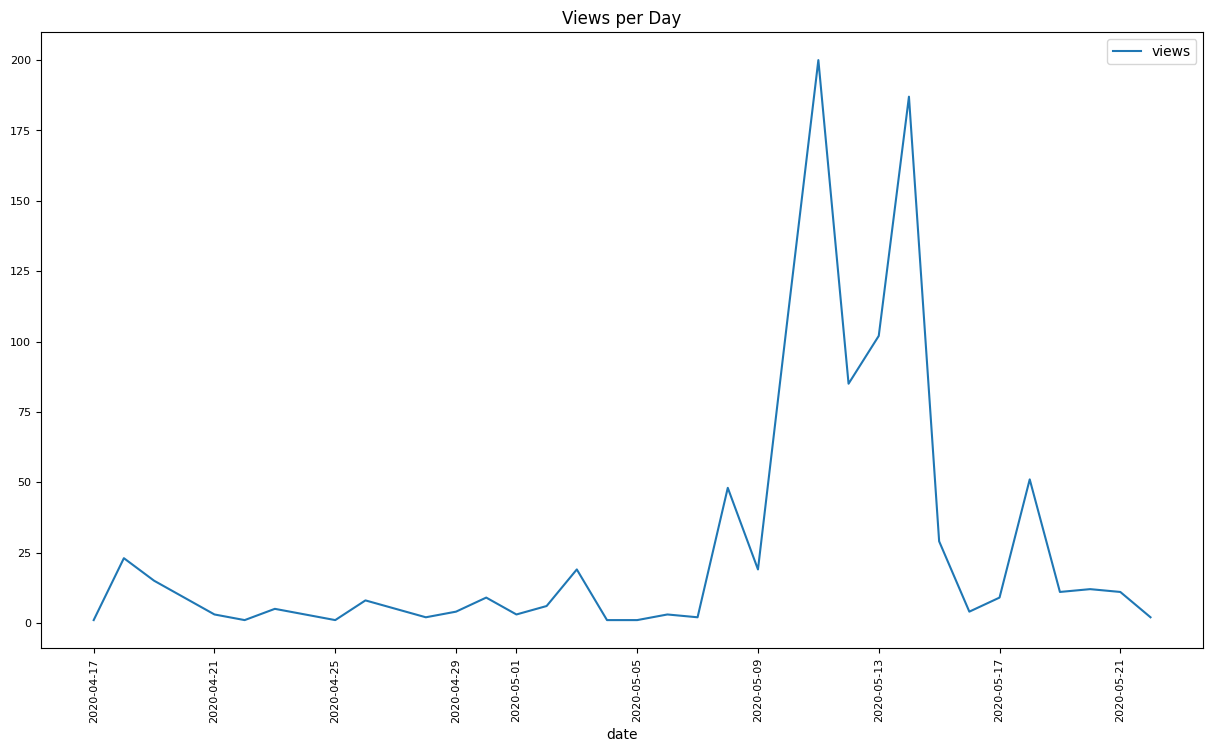

In [6]:
grouped_dates.plot(fontsize=8, title='Views per Day', rot=90, figsize=(15, 8));

## 3. Закрытие соединения

In [7]:
conn.close()